<a href="https://colab.research.google.com/github/Roxanelaigle/DeepBook/blob/master/Copie_de_Bloc1_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



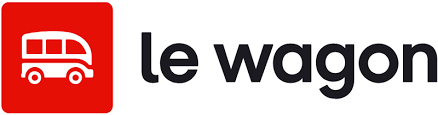



Quels sont les types d’erreurs que l’on peut trouver dans une table après la collecte de données ?

### -- Valeurs manquantes (NULLs)
### -- Doublons (lignes identiques ou même ID)
### -- Formats incohérents (ex : date mal formatée, email incorrect)
### --  Valeurs aberrantes (ex : prix négatif, date future)
### -- Incohérences entre colonnes (ex : JoinDate > LastOrderDate)

Écrivez des exemples de requêtes SQL qui permettent de détecter ces erreurs.



```sql
-- 1. Valeurs manquantes
SELECT COUNT(*) FROM customers WHERE Email IS NULL;

-- 2. Doublons par CustomerID
SELECT CustomerID, COUNT(*) FROM customers
GROUP BY CustomerID HAVING COUNT(*) > 1;

-- 3. Dates invalides (ex : client créé dans le futur)
SELECT * FROM customers WHERE JoinDate > CURRENT_DATE();

-- 4. Valeurs aberrantes (ex : prix négatif)
SELECT * FROM products WHERE InitialPrice < 0;

-- 5. Email invalide (très basique)
SELECT * FROM customers WHERE Email NOT LIKE '%@%.%';

```



Comment faire pour ne pas avoir à lancer ces requêtes manuellement ?

- Créer des jobs planifiés (Scheduled Queries) dans BigQuery pour exécuter automatiquement une requête SQL à une fréquence définie (quotidienne, hebdomadaire, etc.).

- Utiliser un script Python avec la librairie google-cloud-bigquery, intégré à un outil d’orchestration comme Airflow ou Prefect pour planifier, monitorer et chaîner des traitements complexes.

- Déployer les requêtes dans un pipeline avec des outils comme Dataform, DBT ou Looker Studio pour industrialiser les transformations et faciliter leur maintenance.

### Requête d'aggregation

Imaginez qu’il n’y a pas d’erreurs de données dans les tables.

En reprenant les trois tables `sales`, `products` et `customers`, écrivez une requête qui:
          

*   Joint les trois tables pour n’en créer qu’une seule
*   Agrège la donnée pour savoir combien chaque consommateur a acheté de chaque produit en affichant le nom du produit et le prénom du client.

          

Ecrivez votre requête ci-dessous.



```sql
SELECT
  customers.ContactFirstName,
  customers.ContactLastName,
  products.ProductName,
  SUM(orders.NumberOfUnits) AS TotalUnitsPurchased
FROM
  customers
JOIN
  orders ON customers.CustomerID = orders.CustomerID
JOIN
  products ON orders.ProductID = products.ProductID
GROUP BY
  customers.ContactFirstName,
  customers.ContactLastName,
  products.ProductName
ORDER BY
  TotalUnitsPurchased DESC;


```

